In [38]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
import sys # 到其他資料夾

from importlib import reload # 自訂 function 可重新 reload
sys.path.append('/home/hchuang/Documents/Project/SSSD_CP/src')
from utils import util_inference_result
reload(util_inference_result)
from utils.util_inference_result import *

sys.path.append('/home/hchuang/Documents/Project/SSSD_CP/src/datasets_script/NYISO')
from utils.data_utils import *

In [ ]:
main_folder_path = "/home/hchuang/Documents/Project/SSSD_CP/src/"
DATASET = 'dataset_4' # dataset_4 or dataset 6
result = load_result_data(main_folder_path, DATASET)

# 
_,train_days_I2 = date_index(zone_number = 1)

true_data_I2_all, shape: (2061, 192)
true_data_I2_cond, shape: (2061, 168)
true_data_I2_target, shape: (2061, 24)
mul_pred_data_I2, shape: (50, 2061, 24)
median_pred_data_I2, shape: (2061, 24)
true_data_test_all, shape: (73, 192)
true_data_test_cond, shape: (73, 168)
true_data_test_target, shape: (73, 24)
mul_pred_data_test, shape: (50, 73, 24)
median_pred_data_test, shape: (73, 24)


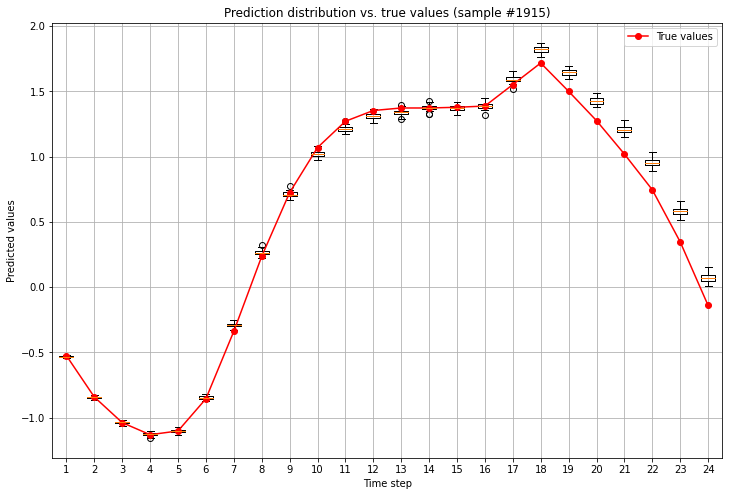

In [57]:
# 假設我們要看第 0 筆時間序列的預測與真實值
idx = 1915

# 取出預測分佈與真實值
pred_dist = result['mul_pred_data_I2'][:, idx, :]      # shape: (50, 24)
true_values = result['true_data_I2_target'][idx, :]    # shape: (24,)

# 對每個時間點畫出預測分佈的 boxplot 並標上真實值
plt.figure(figsize=(12, 8))
plt.boxplot(pred_dist)  # transpose to shape (24, 50)
plt.plot(np.arange(1, 25), true_values, 'ro-', label='True values')
plt.xlabel('Time step')
plt.ylabel('Predicted values')
plt.title(f'Prediction distribution vs. true values (sample #{idx})')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# I2_spring_index = train_days_I2>=294 # >= 4/1
I2_winter_index = train_days_I2>=294 # >= 10/20

In [50]:
np.where(I2_winter_index)[0]

array([ 110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  277,  278,
        279,  280,  281,  282,  283,  284,  285,  286,  287,  288,  289,
        290,  291,  292,  293,  294,  295,  296,  297,  298,  299,  300,
        301,  302,  303,  304,  305,  306,  307,  308,  309,  310,  311,
        312,  313,  314,  462,  463,  464,  465,  466,  467,  468,  469,
        470,  471,  472,  473,  474,  475,  476,  477,  478,  479,  480,
        481,  482,  483,  484,  485,  486,  487,  488,  489,  490,  491,
        492,  493,  494,  495,  496,  497,  498,  499,  500,  501,  502,
        636,  637,  638,  639,  640,  641,  642,  643,  644,  645,  646,
        647,  648,  649,  650,  651,  652,  653,  654,  655,  656,  657,
        658,  659,  660,  661,  662,  663,  664,  665,  666,  667,  668,
        669,  670,  671,  672,  673,  674,  675,  8

In [49]:
I2_winter_index[I2_winter_index].index

DatetimeIndex(['2005-10-21', '2005-10-22', '2005-10-25', '2005-10-29',
               '2005-10-31', '2005-11-01', '2005-11-02', '2005-11-07',
               '2005-11-08', '2005-11-10',
               ...
               '2015-12-16', '2015-12-17', '2015-12-20', '2015-12-22',
               '2015-12-23', '2015-12-26', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', length=418, freq=None)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


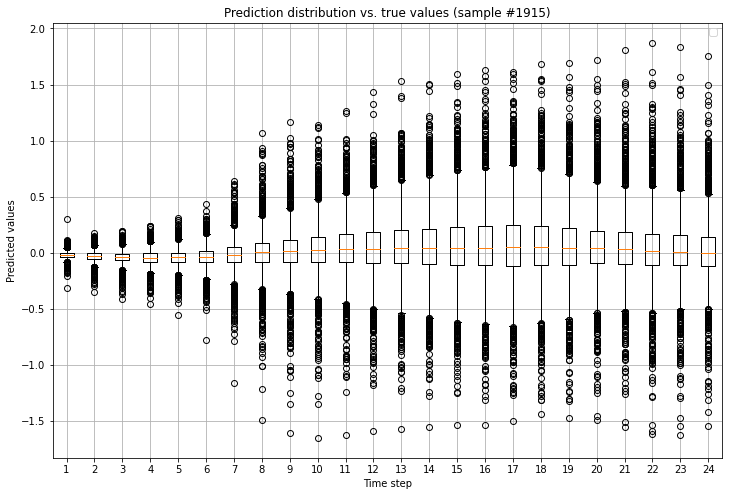

In [67]:
error = result['true_data_I2_target'] - result['median_pred_data_I2']

# 對每個時間點畫出預測分佈的 boxplot 並標上真實值
plt.figure(figsize=(12, 8))
plt.boxplot(error)  # transpose to shape (, 24)
# plt.plot(np.arange(1, 25), true_values, 'ro-', label='True values')
plt.xlabel('Time step')
plt.ylabel('Predicted values')
plt.title(f'Prediction distribution vs. true values (sample #{idx})')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


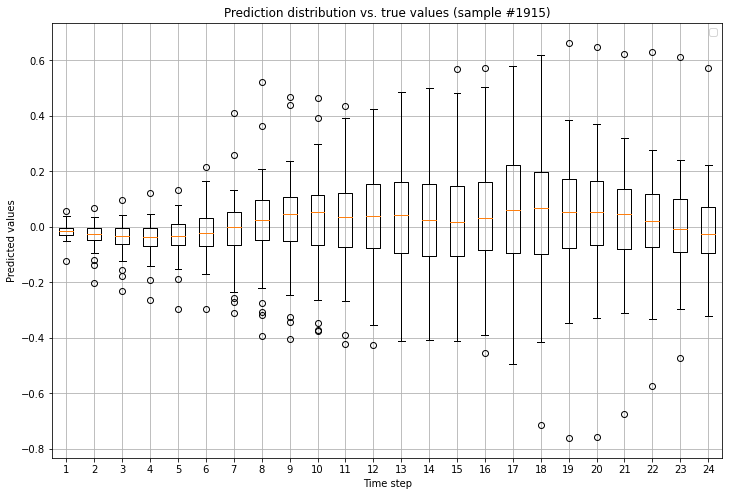

In [ ]:
error = result['true_data_test_target'] - result['median_pred_data_test']

# 對每個時間點畫出預測分佈的 boxplot 並標上真實值
plt.figure(figsize=(12, 8))
plt.boxplot(error)  # transpose to shape (, 24)
# plt.plot(np.arange(1, 25), true_values, 'ro-', label='True values')
plt.xlabel('Time step')
plt.ylabel('Predicted values')
plt.title(f'Prediction distribution vs. true values (sample #{idx})')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


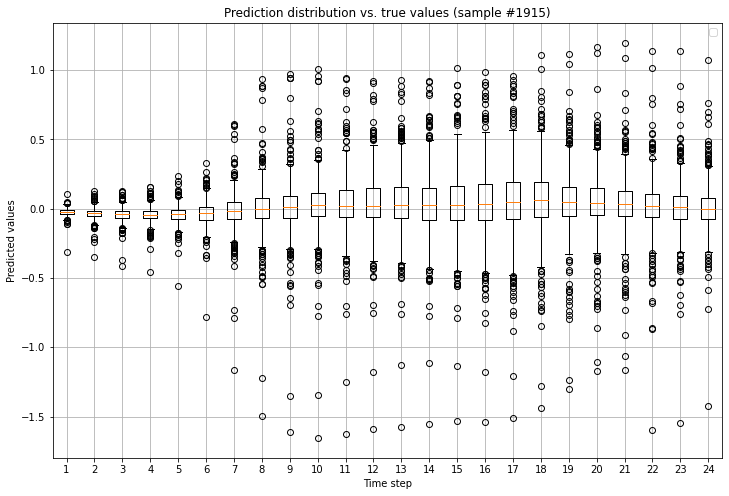

In [ ]:
I2_summer_index = (train_days_I2>270) | (train_days_I2<30) # >= 10/20
error = result['true_data_I2_target'][I2_summer_index, :] - result['median_pred_data_I2'][I2_summer_index, :]

# 對每個時間點畫出預測分佈的 boxplot 並標上真實值
plt.figure(figsize=(12, 8))
plt.boxplot(error)  # transpose to shape (, 24)
# plt.plot(np.arange(1, 25), true_values, 'ro-', label='True values')
plt.xlabel('Time step')
plt.ylabel('Predicted values')
plt.title(f'Prediction distribution vs. true values (sample #{idx})')
plt.legend()
plt.grid(True)
plt.show()